# 1. Descripción de la base de datos

In [1]:
## Origen: https://www.kaggle.com/datasets/paperxd/all-computer-prices
## Objetivo: 
## Tamaño: 100000 registros, 33 columnas
## Tipo de variables: Categóricas y numéricas
## Campos importantes: 'price', 'brand', 'processor_brand', 'ram_size', 'storage_type', 'gpu_brand'
## Problemas potenciales: Valores faltantes en algunas columnas, posibles outliers en 'price' y 'storage_type'

# 2. Lectura de base de datos

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('computer_prices_all.csv')
df.head()

,device_type,brand,model,release_year,os,form_factor,cpu_brand,cpu_model,cpu_tier,cpu_cores,...,resolution,refresh_hz,battery_wh,charger_watts,psu_watts,wifi,bluetooth,weight_kg,warranty_months,price
0,Desktop,Samsung,Samsung Forge XDI,2022,Windows,ATX,Intel,Intel i5-11129,3,12,...,2560x1440,90,0,0,750,Wi-Fi 6,5.1,11.00,36,1383.99
1,Laptop,Samsung,Samsung Pro KM8,2022,Windows,Mainstream,Intel,Intel i7-11114,4,12,...,1920x1080,90,56,120,0,Wi-Fi 6,5.3,2.03,12,2274.99
2,Desktop,Lenovo,Lenovo Strix BIE,2024,macOS,SFF,AMD,AMD Ryzen 5 5168,2,8,...,3440x1440,120,0,0,850,Wi-Fi 6,5.0,7.00,24,1879.99
3,Desktop,Dell,Dell Cube AXR,2024,Windows,ATX,AMD,AMD Ryzen 5 7550,2,6,...,3440x1440,120,0,0,650,Wi-Fi 6,5.2,6.00,36,1331.99
4,Laptop,Gigabyte,Gigabyte Pro IX1,2024,Linux,Gaming,AMD,AMD Ryzen 7 6230,5,16,...,2560x1600,90,80,90,0,Wi-Fi 6,5.2,1.50,12,2681.99


# 3. Limpieza de base de datos


In [4]:

df.columns = (df.columns.str.strip().str.lower().str.replace(' ', '_').str.replace("-", "_"))
df.head()

,device_type,brand,model,release_year,os,form_factor,cpu_brand,cpu_model,cpu_tier,cpu_cores,...,resolution,refresh_hz,battery_wh,charger_watts,psu_watts,wifi,bluetooth,weight_kg,warranty_months,price
0,Desktop,Samsung,Samsung Forge XDI,2022,Windows,ATX,Intel,Intel i5-11129,3,12,...,2560x1440,90,0,0,750,Wi-Fi 6,5.1,11.00,36,1383.99
1,Laptop,Samsung,Samsung Pro KM8,2022,Windows,Mainstream,Intel,Intel i7-11114,4,12,...,1920x1080,90,56,120,0,Wi-Fi 6,5.3,2.03,12,2274.99
2,Desktop,Lenovo,Lenovo Strix BIE,2024,macOS,SFF,AMD,AMD Ryzen 5 5168,2,8,...,3440x1440,120,0,0,850,Wi-Fi 6,5.0,7.00,24,1879.99
3,Desktop,Dell,Dell Cube AXR,2024,Windows,ATX,AMD,AMD Ryzen 5 7550,2,6,...,3440x1440,120,0,0,650,Wi-Fi 6,5.2,6.00,36,1331.99
4,Laptop,Gigabyte,Gigabyte Pro IX1,2024,Linux,Gaming,AMD,AMD Ryzen 7 6230,5,16,...,2560x1600,90,80,90,0,Wi-Fi 6,5.2,1.50,12,2681.99


In [5]:
df["price"]=pd.to_numeric(df["price"], errors='coerce')

In [6]:
df.isna().sum().sort_values(ascending=True)

device_type            0
brand                  0
model                  0
release_year           0
os                     0
form_factor            0
cpu_brand              0
cpu_model              0
cpu_tier               0
cpu_cores              0
cpu_threads            0
cpu_base_ghz           0
cpu_boost_ghz          0
gpu_brand              0
gpu_model              0
gpu_tier               0
vram_gb                0
ram_gb                 0
storage_type           0
storage_gb             0
storage_drive_count    0
display_type           0
display_size_in        0
resolution             0
refresh_hz             0
battery_wh             0
charger_watts          0
psu_watts              0
wifi                   0
bluetooth              0
weight_kg              0
warranty_months        0
price                  0
dtype: int64

In [7]:
numero_duplicados = df.duplicated().sum()
print("Duplicados exactos:", numero_duplicados)

Duplicados exactos: 0


In [8]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
device_type,100000,2,Laptop,59844,NaN,NaN,NaN,NaN,NaN,NaN,NaN
brand,100000,10,Lenovo,15992,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model,100000,99036,HP Creator R41,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
release_year,100000.0,NaN,NaN,NaN,2022.32085,2.025761,2018.0,2021.0,2023.0,2024.0,2025.0
os,100000,4,Windows,71817,NaN,NaN,NaN,NaN,NaN,NaN,NaN
form_factor,100000,10,Mainstream,17819,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cpu_brand,100000,3,Intel,52774,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cpu_model,100000,26971,Apple M2 Pro,1389,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cpu_tier,100000.0,NaN,NaN,NaN,3.15349,1.373175,1.0,2.0,3.0,4.0,6.0
cpu_cores,100000.0,NaN,NaN,NaN,10.51574,5.044092,4.0,6.0,8.0,14.0,28.0


In [9]:
print(df.dtypes)

device_type             object
brand                   object
model                   object
release_year             int64
os                      object
form_factor             object
cpu_brand               object
cpu_model               object
cpu_tier                 int64
cpu_cores                int64
cpu_threads              int64
cpu_base_ghz           float64
cpu_boost_ghz          float64
gpu_brand               object
gpu_model               object
gpu_tier                 int64
vram_gb                  int64
ram_gb                   int64
storage_type            object
storage_gb               int64
storage_drive_count      int64
display_type            object
display_size_in        float64
resolution              object
refresh_hz               int64
battery_wh               int64
charger_watts            int64
psu_watts                int64
wifi                    object
bluetooth              float64
weight_kg              float64
warranty_months          int64
price   

In [10]:
df.describe(include='all')

,device_type,brand,model,release_year,os,form_factor,cpu_brand,cpu_model,cpu_tier,cpu_cores,...,resolution,refresh_hz,battery_wh,charger_watts,psu_watts,wifi,bluetooth,weight_kg,warranty_months,price
count,100000,100000,100000,100000.000000,100000,100000,100000,100000,100000.000000,100000.000000,...,100000,100000.000000,100000.000000,100000.000000,100000.000000,100000,100000.000000,100000.000000,100000.00000,100000.000000
unique,2,10,99036,NaN,4,10,3,26971,NaN,NaN,...,6,NaN,NaN,NaN,NaN,4,NaN,NaN,NaN,NaN
top,Laptop,Lenovo,HP Creator R41,NaN,Windows,Mainstream,Intel,Apple M2 Pro,NaN,NaN,...,1920x1080,NaN,NaN,NaN,NaN,Wi-Fi 6,NaN,NaN,NaN,NaN
freq,59844,15992,3,NaN,71817,17819,52774,1389,NaN,NaN,...,47993,NaN,NaN,NaN,NaN,46149,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,2022.320850,NaN,NaN,NaN,NaN,3.153490,10.515740,...,NaN,98.464860,41.813470,61.383450,272.520500,NaN,5.084764,4.289699,22.20036,1928.764220
std,NaN,NaN,NaN,2.025761,NaN,NaN,NaN,NaN,1.373175,5.044092,...,NaN,43.301652,35.868841,62.795034,354.686355,NaN,0.245977,3.814628,10.23190,580.492689
min,NaN,NaN,NaN,2018.000000,NaN,NaN,NaN,NaN,1.000000,4.000000,...,NaN,60.000000,0.000000,0.000000,0.000000,NaN,4.200000,0.920000,12.00000,372.990000
25%,NaN,NaN,NaN,2021.000000,NaN,NaN,NaN,NaN,2.000000,6.000000,...,NaN,60.000000,0.000000,0.000000,0.000000,NaN,5.000000,1.500000,12.00000,1503.990000
50%,NaN,NaN,NaN,2023.000000,NaN,NaN,NaN,NaN,3.000000,8.000000,...,NaN,90.000000,56.000000,65.000000,0.000000,NaN,5.100000,2.000000,24.00000,1863.990000
75%,NaN,NaN,NaN,2024.000000,NaN,NaN,NaN,NaN,4.000000,14.000000,...,NaN,120.000000,70.000000,90.000000,650.000000,NaN,5.200000,7.000000,24.00000,2287.990000


In [11]:
# ejemplo: quitar $ y comas y convertir a float
df['price'] = (df['price'].astype(str)      # asegurar string
    .str.replace(r"[\$,]", "", regex=True)  # quita $ y comas
    .str.replace(" ", "")                   # quita espacios
    .replace("", pd.NA)                     # convertir cadenas vacías a NA
)
df['price'] = pd.to_numeric(df['price'], errors='coerce')
print("price dtype:", df['price'].dtype)
print("Nulos en price:", df['price'].isna().sum())


price dtype: float64
Nulos en price: 0


# 4. Caracterización de datos

In [12]:
df["device_type"].value_counts()

device_type
Laptop     59844
Desktop    40156
Name: count, dtype: int64

In [13]:
df["brand"].value_counts()

brand
Lenovo      15992
HP          14114
Dell        14005
Apple       11915
ASUS        10159
Acer         9925
Samsung      8066
MSI          7891
Gigabyte     4900
Razer        3033
Name: count, dtype: int64

In [14]:
df["ram_gb"].value_counts()

ram_gb
32     22565
16     22258
8      18482
64     16973
96      9172
128     2578
24      2258
40      1965
72      1555
104      817
48       501
80       374
136      249
112      193
144       60
Name: count, dtype: int64

In [15]:
df["storage_gb"].value_counts()

storage_gb
512     35236
1024    30137
256     19816
2048    11839
4096     2972
Name: count, dtype: int64

In [16]:
df["cpu_cores"].value_counts()

cpu_cores
8     24114
6     17723
12    15705
16     9368
4      8655
10     8510
14     6641
18     3858
24     3256
26     1449
20      521
28      200
Name: count, dtype: int64

In [17]:
df["cpu_brand"].value_counts()

cpu_brand
Intel    52774
AMD      35311
Apple    11915
Name: count, dtype: int64

In [18]:
df["gpu_brand"].value_counts()


gpu_brand
NVIDIA    54712
Apple     18922
AMD       15767
Intel     10599
Name: count, dtype: int64

In [19]:
df["vram_gb"].describe()

count    100000.000000
mean          6.152180
std           3.964926
min           0.000000
25%           4.000000
50%           6.000000
75%           8.000000
max          16.000000
Name: vram_gb, dtype: float64

In [20]:
df["price"].describe()

count    100000.000000
mean       1928.764220
std         580.492689
min         372.990000
25%        1503.990000
50%        1863.990000
75%        2287.990000
max       10984.990000
Name: price, dtype: float64

# 5. Funciones auxiliares

In [21]:
def describe_columns(df):
    print("Columnas numéricas")
    display(df.select_dtypes(include=['int64', 'float64']).describe())

    print("\nColumnas categóricas")
    for col in df.select_dtypes(include='object').columns:
        print(f"\n{col}: {df[col].nunique()} categorías -> {df[col].unique()[:10]}")
print(describe_columns(df))

Columnas numéricas


,release_year,cpu_tier,cpu_cores,cpu_threads,cpu_base_ghz,cpu_boost_ghz,gpu_tier,vram_gb,ram_gb,storage_gb,storage_drive_count,display_size_in,refresh_hz,battery_wh,charger_watts,psu_watts,bluetooth,weight_kg,warranty_months,price
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000
mean,2022.320850,3.153490,10.515740,19.372700,2.591322,3.531310,2.991350,6.152180,39.706400,903.936000,1.524980,20.126655,98.464860,41.813470,61.383450,272.520500,5.084764,4.289699,22.20036,1928.764220
std,2.025761,1.373175,5.044092,9.718426,0.336435,0.350024,1.459643,3.964926,31.902684,774.243654,0.797284,6.709577,43.301652,35.868841,62.795034,354.686355,0.245977,3.814628,10.23190,580.492689
min,2018.000000,1.000000,4.000000,4.000000,2.000000,2.800000,1.000000,0.000000,8.000000,256.000000,1.000000,13.300000,60.000000,0.000000,0.000000,0.000000,4.200000,0.920000,12.00000,372.990000
25%,2021.000000,2.000000,6.000000,12.000000,2.400000,3.300000,2.000000,4.000000,16.000000,512.000000,1.000000,14.000000,60.000000,0.000000,0.000000,0.000000,5.000000,1.500000,12.00000,1503.990000
50%,2023.000000,3.000000,8.000000,16.000000,2.600000,3.500000,3.000000,6.000000,32.000000,512.000000,1.000000,16.000000,90.000000,56.000000,65.000000,0.000000,5.100000,2.000000,24.00000,1863.990000
75%,2024.000000,4.000000,14.000000,24.000000,2.800000,3.800000,4.000000,8.000000,64.000000,1024.000000,2.000000,27.000000,120.000000,70.000000,90.000000,650.000000,5.200000,7.000000,24.00000,2287.990000
max,2025.000000,6.000000,28.000000,56.000000,3.400000,4.500000,6.000000,16.000000,144.000000,4096.000000,4.000000,34.000000,240.000000,99.000000,240.000000,1200.000000,5.300000,16.000000,48.00000,10984.990000



Columnas categóricas

device_type: 2 categorías -> ['Desktop' 'Laptop']

brand: 10 categorías -> ['Samsung' 'Lenovo' 'Dell' 'Gigabyte' 'MSI' 'Apple' 'HP' 'Acer' 'ASUS'
 'Razer']

model: 99036 categorías -> ['Samsung Forge XDI' 'Samsung Pro KM8' 'Lenovo Strix BIE' 'Dell Cube AXR'
 'Gigabyte Pro IX1' 'MSI Think KSG' 'Apple Arena R5Q' 'Apple Station EWP'
 'Dell Creator GIQ' 'Lenovo Blade MIZ']

os: 4 categorías -> ['Windows' 'macOS' 'Linux' 'ChromeOS']

form_factor: 10 categorías -> ['ATX' 'Mainstream' 'SFF' 'Gaming' 'Micro-ATX' 'Ultrabook' '2-in-1'
 'Mini-ITX' 'Full-Tower' 'Workstation']

cpu_brand: 3 categorías -> ['Intel' 'AMD' 'Apple']

cpu_model: 26971 categorías -> ['Intel i5-11129' 'Intel i7-11114' 'AMD Ryzen 5 5168' 'AMD Ryzen 5 7550'
 'AMD Ryzen 7 6230' 'Intel i7-10369' 'Apple M2' 'Apple M2 Pro'
 'Intel i9-14473' 'AMD Ryzen 3 4374']

gpu_brand: 4 categorías -> ['NVIDIA' 'AMD' 'Apple' 'Intel']

gpu_model: 49 categorías -> ['RTX 40 60' 'RTX 40 80' 'RTX 40 50' 'RX 7000 60' 'RTX 30 

In [30]:
def descripcion_variables(df):
    variables_clav = ['gpu_brand', 'gpu_tier', 'ram_gb', 'cpu_cores', 'cpu_model', 'battery_wh', 'price']
    return df[variables_clav].describe(include='all')
print(descripcion_variables(df))

       gpu_brand       gpu_tier         ram_gb      cpu_cores     cpu_model  \
count     100000  100000.000000  100000.000000  100000.000000        100000   
unique         4            NaN            NaN            NaN         26971   
top       NVIDIA            NaN            NaN            NaN  Apple M2 Pro   
freq       54712            NaN            NaN            NaN          1389   
mean         NaN       2.991350      39.706400      10.515740           NaN   
std          NaN       1.459643      31.902684       5.044092           NaN   
min          NaN       1.000000       8.000000       4.000000           NaN   
25%          NaN       2.000000      16.000000       6.000000           NaN   
50%          NaN       3.000000      32.000000       8.000000           NaN   
75%          NaN       4.000000      64.000000      14.000000           NaN   
max          NaN       6.000000     144.000000      28.000000           NaN   

           battery_wh          price  
count   1000

In [22]:
def datos_faltantes(df):
    faltantes = df.isna().sum()
    faltantes = faltantes[faltantes > 0].sort_values(ascending=False)
    return faltantes
print(datos_faltantes(df))

Series([], dtype: int64)


In [31]:
def correlacion_de_precios(df):
    variables_numericas = ['ram_gb', 'cpu_cores', 'battery_wh', 'price']
    return df[variables_numericas].corr()['price'].sort_values(ascending=False)
print(correlacion_de_precios(df))

price         1.000000
ram_gb        0.758654
cpu_cores     0.720464
battery_wh    0.147212
Name: price, dtype: float64


In [25]:
import matplotlib.pyplot as plt

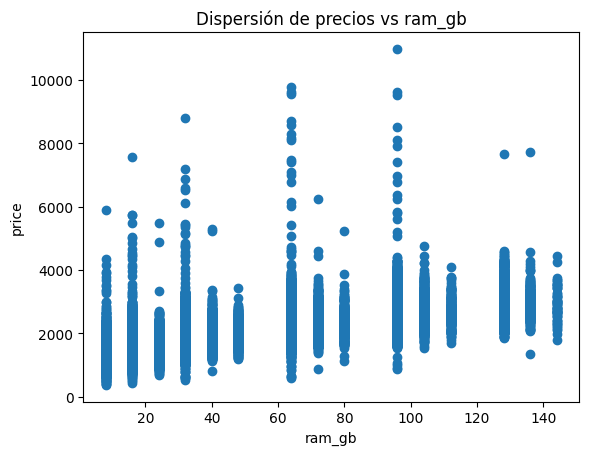

None


In [26]:
def dispersion_precios(df, feature):
    plt.scatter(df[feature], df['price'])
    plt.xlabel(feature)
    plt.ylabel('price')
    plt.title(f'Dispersión de precios vs {feature}')
    plt.show()
print(dispersion_precios(df, 'ram_gb'))

# 6. Cálculo de estadísticas descriptivas

In [33]:
df[['ram_gb', 'cpu_cores', 'battery_wh', 'price']].describe().T

,count,mean,std,min,25%,50%,75%,max
ram_gb,100000.0,39.70640,31.902684,8.00,16.00,32.00,64.00,144.00
cpu_cores,100000.0,10.51574,5.044092,4.00,6.00,8.00,14.00,28.00
battery_wh,100000.0,41.81347,35.868841,0.00,0.00,56.00,70.00,99.00
price,100000.0,1928.76422,580.492689,372.99,1503.99,1863.99,2287.99,10984.99


In [34]:
df['gpu_brand'].value_counts()

gpu_brand
NVIDIA    54712
Apple     18922
AMD       15767
Intel     10599
Name: count, dtype: int64

In [35]:
df['gpu_tier'].value_counts()

gpu_tier
3    23144
2    21256
1    19259
4    19135
5    11844
6     5362
Name: count, dtype: int64

In [36]:
df['cpu_model'].value_counts().head(20)

cpu_model
Apple M2 Pro        1389
Apple M1            1374
Apple M2 Max        1367
Apple M1 Pro        1341
Apple M3 Pro        1315
Apple M3 Max        1300
Apple M3            1287
Apple M1 Max        1277
Apple M2            1265
Intel i5-14535        14
AMD Ryzen 5 3553      14
Intel i5-10630        14
Intel i5-13475        14
Intel i5-14497        14
Intel i5-10434        14
Intel i5-10828        14
Intel i5-13511        13
Intel i5-10534        13
Intel i5-11792        13
Intel i5-14385        13
Name: count, dtype: int64

In [37]:
df[['ram_gb', 'cpu_cores', 'battery_wh', 'price']].corr()

,ram_gb,cpu_cores,battery_wh,price
ram_gb,1.000000,0.906770,-0.045346,0.758654
cpu_cores,0.906770,1.000000,-0.032600,0.720464
battery_wh,-0.045346,-0.032600,1.000000,0.147212
price,0.758654,0.720464,0.147212,1.000000


In [38]:
print("RAM:", df['ram_gb'].min(), df['ram_gb'].max(), df['ram_gb'])
print("CPU cores:", df['cpu_cores'].min(), df['cpu_cores'].max(), df['cpu_cores'])
print("Battery Wh:", df['battery_wh'].min(), df['battery_wh'].max())
print("GPU tier:", df['gpu_tier'].unique())

RAM: 8 144 0         16
1         64
2          8
3         16
4         96
        ... 
99995     32
99996      8
99997     16
99998     32
99999    128
Name: ram_gb, Length: 100000, dtype: int64
CPU cores: 4 28 0        12
1        12
2         8
3         6
4        16
         ..
99995    12
99996     8
99997     6
99998    12
99999    26
Name: cpu_cores, Length: 100000, dtype: int64
Battery Wh: 0 99
GPU tier: [2 4 1 5 6 3]
